In [17]:
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [18]:
run main.py

In [19]:
steam = read_to_pandas(steam_path)
steam = steam.append({'151603712':'151603712','The Elder Scrolls V Skyrim':'The Elder Scrolls V Skyrim','purchase':'purchase','1.0':'1.0'}, ignore_index = True)
steam = steam.rename(columns = {"151603712":"userid", "The Elder Scrolls V Skyrim":"game", "purchase":"own", "1.0":"playtime"})
steam

,userid,game,own,playtime,0
0,151603712,The Elder Scrolls V Skyrim,play,273,0.0
1,151603712,Fallout 4,purchase,1,0.0
2,151603712,Fallout 4,play,87,0.0
3,151603712,Spore,purchase,1,0.0
4,151603712,Spore,play,14.9,0.0
...,...,...,...,...,...
199995,128470551,Grand Theft Auto Vice City,purchase,1,0.0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0.0
199997,128470551,RUSH,purchase,1,0.0
199998,128470551,RUSH,play,1.4,0.0


In [20]:
dota_owners = steam[(steam['game'] == "Dota 2")]['userid'].unique()
no_dota = steam[(steam['game'] != "Dota 2")]

In [21]:
ownsdota = steam[steam['userid'].isin(dota_owners)]
no_dota = steam[~steam['userid'].isin(dota_owners)]

In [22]:
duser_purchasecount = ownsdota[ownsdota['own'] == 'purchase'].groupby('userid').count()
duser_playtime = ownsdota[ownsdota['own'] == 'play'].groupby('userid')['playtime'].sum()

dota_users = duser_purchasecount.merge(duser_playtime, on = 'userid')

In [23]:
no_duser_purchasecount = no_dota[no_dota['own'] == 'purchase'].groupby('userid').count()
no_duser_playtime = no_dota[no_dota['own'] == 'play'].groupby('userid')['playtime'].sum()

no_dota_users = no_duser_purchasecount.merge(no_duser_playtime, on = 'userid')

In [24]:
print(no_dota_users)
print(dota_users)


           game  own  playtime_x   0  playtime_y
userid                                          
76767        36   36          36  36      1227.0
86540        82   82          82  82       255.0
144736        8    8           8   8         0.1
181212       12   12          12  12         2.2
229911       27   27          27  27       390.5
...         ...  ...         ...  ..         ...
309262440     3    3           3   3         1.2
309265377     2    2           2   2         2.8
309404240     5    5           5   5        18.4
309554670     1    1           1   1         5.9
309626088     1    1           1   1         6.7

[6509 rows x 5 columns]
           game  own  playtime_x    0  playtime_y
userid                                           
5250         21   21          21   21       225.5
298950      259  259         259  259      3745.4
975449      378  378         378  378      2165.0
994489       23   23          23   23      1396.2
1612666      28   28          28   28 

In [25]:
played = steam[steam['own'] == 'play'].groupby('userid').count()

no_dota_users = no_dota_users.merge(played['playtime'], on='userid')
dota_users = dota_users.merge(played['playtime'], on='userid')


# no_dota_users['opratio'] = (no_dota_users['own']/no_dota_users['playtime']).round()
# dota_users['opratio'] = (dota_users['own']/dota_users['playtime']).round()

no_dota_users



,game,own,playtime_x,0,playtime_y,playtime
userid,,,,,,
76767,36,36,36,36,1227.0,20
86540,82,82,82,82,255.0,15
144736,8,8,8,8,0.1,1
181212,12,12,12,12,2.2,2
229911,27,27,27,27,390.5,18
...,...,...,...,...,...,...
309262440,3,3,3,3,1.2,1
309265377,2,2,2,2,2.8,2
309404240,5,5,5,5,18.4,5


In [26]:
dota_users = dota_users.rename(columns={'own':'Games Owned', 'playtime_y':'Total Time Played', 'playtime':'Games Played'})
no_dota_users = no_dota_users.rename(columns={'own':'Games Owned', 'playtime_y':'Total Time Played', 'playtime':'Games Played'})

In [27]:
print("Non-Dota 2 user summary:")
no_dota_users[['Games Owned', 'Games Played', 'Total Time Played']]
# dota_users[['Games Owned', 'Games Played', 'Total Time Played']]

Non-Dota 2 user summary:


,Games Owned,Games Played,Total Time Played
userid,,,
76767,36,20,1227.0
86540,82,15,255.0
144736,8,1,0.1
181212,12,2,2.2
229911,27,18,390.5
...,...,...,...
309262440,3,1,1.2
309265377,2,2,2.8
309404240,5,5,18.4


In [28]:
dota_users['O/P Ratio'] = dota_users['Games Owned'] / dota_users['Games Played']
no_dota_users['O/P Ratio'] = no_dota_users['Games Owned'] / no_dota_users['Games Played']

In [29]:
print(no_dota_users[['Games Owned', 'Games Played', 'O/P Ratio', 'Total Time Played']].describe())
print()
print(dota_users[['Games Owned', 'Games Played', 'O/P Ratio', 'Total Time Played']].describe())

       Games Owned  Games Played    O/P Ratio  Total Time Played
count  6509.000000   6509.000000  6509.000000        6509.000000
mean     10.078046      5.548471     1.824001         236.774727
std      29.914518     13.355834     1.835974         650.084033
min       1.000000      1.000000     1.000000           0.100000
25%       1.000000      1.000000     1.000000           2.900000
50%       3.000000      2.000000     1.083333          22.000000
75%       7.000000      4.000000     2.000000         153.800000
max     766.000000    208.000000    59.000000       11754.000000

       Games Owned  Games Played    O/P Ratio  Total Time Played
count  4841.000000   4841.000000  4841.000000        4841.000000
mean     12.662673      7.100599     1.627358         393.348296
std      45.468548     22.321653     2.509191         937.763340
min       1.000000      1.000000     1.000000           0.100000
25%       1.000000      1.000000     1.000000           1.800000
50%       1.000000      

In [30]:
def bootstrap_diff(samp1, samp2):
    bootstrap_diff = []
    for i in range(0, 50000):
        bootstrap1 = np.random.choice(samp1, size=len(samp1), replace=True)
        bootstrap2 = np.random.choice(samp2, size=len(samp2), replace=True)
        bootstrap_diff.append(np.mean(bootstrap1)-np.mean(bootstrap2))
    return bootstrap_diff


In [31]:
dotaOP = dota_users['O/P Ratio']
no_dotaOP = no_dota_users['O/P Ratio']

OP_bootstrap = bootstrap_diff(dotaOP, no_dotaOP)


In [32]:
dotaOP = dota_users['Games Owned']
no_dotaOP = no_dota_users['Games Owned']

owned_bootstrap = bootstrap_diff(dotaOP, no_dotaOP)


In [33]:
dotaOP = dota_users['Games Played']
no_dotaOP = no_dota_users['Games Played']

played_bootstrap = bootstrap_diff(dotaOP, no_dotaOP)


In [34]:
dotaOP = dota_users['Total Time Played']
no_dotaOP = no_dota_users['Total Time Played']

playtime_bootstrap = bootstrap_diff(dotaOP, no_dotaOP)

np.percentile(playtime_bootstrap,[2.5, 97.5])

array([126.16275681, 187.46067388])

In [35]:
perc = []

perc.append(np.percentile(owned_bootstrap,[2.5, 97.5]))
perc.append(np.percentile(played_bootstrap,[2.5, 97.5]))
perc.append(np.percentile(playtime_bootstrap,[2.5, 97.5]))
perc.append(np.percentile(OP_bootstrap,[2.5, 97.5]))

means = []
means.append(round(np.mean(owned_bootstrap),2))
means.append(round(np.mean(played_bootstrap),2))
means.append(round(np.mean(playtime_bootstrap),2))
means.append(round(np.mean(OP_bootstrap), 2))
means

[2.59, 1.55, 156.53, -0.2]

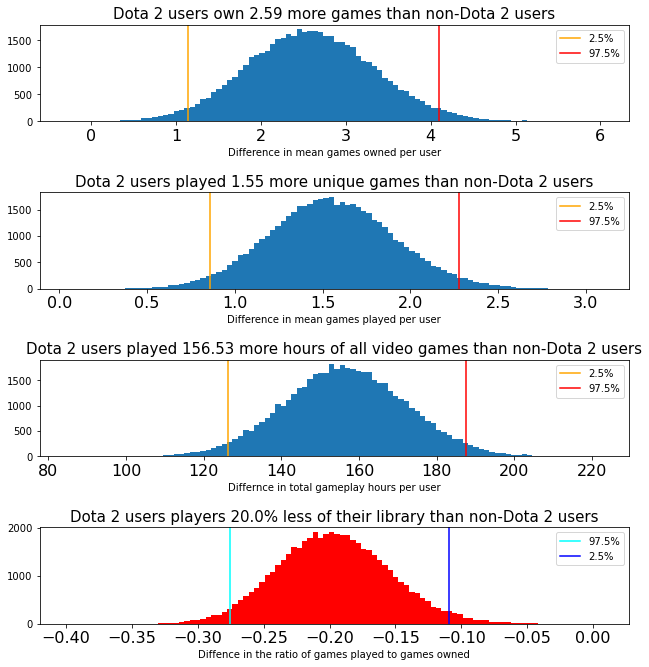

In [38]:
fig, axs = plt.subplots(4, figsize = (10,10))

fig.tight_layout(pad = 5)
plt.setp(axs[0].get_xticklabels(), fontsize=16)
plt.setp(axs[1].get_xticklabels(), fontsize=16)
plt.setp(axs[2].get_xticklabels(), fontsize=16)
plt.setp(axs[3].get_xticklabels(), fontsize=16)

axs[0].hist(owned_bootstrap, bins = 100)
axs[0].set_title(f"Dota 2 users own {means[0]} more games than non-Dota 2 users", fontsize = 15)
axs[0].axvline(perc[0][0], color='orange', alpha = 1)
axs[0].axvline(perc[0][1], color='red', alpha = 1)
axs[0].set_xlabel("Difference in mean games owned per user")
axs[0].legend(('2.5%', '97.5%'))


axs[1].hist(played_bootstrap, bins = 100)
axs[1].set_title(f"Dota 2 users played {means[1]} more unique games than non-Dota 2 users", fontsize = 15)
axs[1].axvline(perc[1][0], color='orange', alpha = 1)
axs[1].axvline(perc[1][1], color='red', alpha = 1)
axs[1].set_xlabel("Difference in mean games played per user")
axs[1].legend(('2.5%', '97.5%'))
 
axs[2].hist(playtime_bootstrap, bins = 100)
axs[2].set_title(f"Dota 2 users played {means[2]} more hours of all video games than non-Dota 2 users", fontsize = 15)
axs[2].axvline(perc[2][0], color='orange', alpha = 1)
axs[2].axvline(perc[2][1], color='red', alpha = 1)
axs[2].set_xlabel("Differnce in total gameplay hours per user")
axs[2].legend(('2.5%', '97.5%'))

axs[3].hist(OP_bootstrap, bins = 100, color = 'red')
axs[3].set_title(f"Dota 2 users players {-100*means[3]}% less of their library than non-Dota 2 users", fontsize = 15)
axs[3].axvline(perc[3][0], color='cyan', alpha = 1)
axs[3].axvline(perc[3][1], color='blue', alpha = 1)
axs[3].set_xlabel("Diffence in the ratio of games played to games owned")
axs[3].legend(('97.5%','2.5%'))
